<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

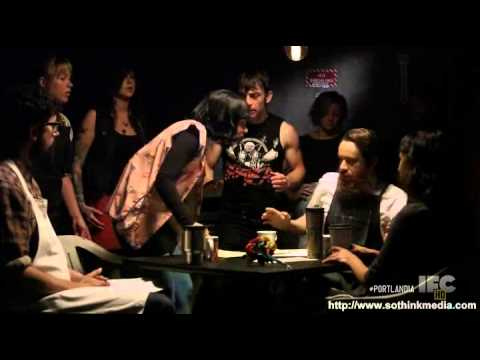

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/christian/Lambda/Unit 4/DS-Unit-41x/411'

In [3]:
import pandas as pd
import os

# Shows how long models will take to run
from tqdm import tqdm
tqdm.pandas() # specfic to pandas
from collections import Counter
import re

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

# This string of characters joins together this line and can be used to reproduce pointing to a file in a location regardless of the os type
filePath = os.path.abspath("data/yelp_coffeeshop_review_data.csv")

# Plots
import squarify # visualization library: will be used to visualize most common words
import matplotlib.pyplot as plt
import seaborn as sns


shops = pd.read_csv(filePath)
shops.head()

/home/christian/anaconda3/envs/U41x/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [5]:
shops['coffee_shop_name'] = shops['coffee_shop_name'].apply(lambda x: x.lower())
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())
shops['coffee_shop_name'].value_counts()

epoch coffee                            400
halcyon                                 300
the factory - cafe with a soul          244
venezia italian gelato                  200
houndstooth coffee                      200
                                       ... 
lucky lab coffee                         25
sister coffee                            17
kowabunga coffee                         16
the marvelous vintage tea party co.      10
lola savannah coffee downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [6]:
shops['full_review_text'].head()

0     11/25/2016 1 check-in love love loved the atm...
1     12/2/2016 listed in date night: austin, ambia...
2     11/30/2016 1 check-in listed in brunch spots ...
3     11/25/2016 very cool decor! good drinks nice ...
4     12/3/2016 1 check-in they are located within ...
Name: full_review_text, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [13]:
STOP_WORDS = nlp.Defaults.stop_words.union(['check-in','1', 'coffee', 'm%/d%/y%', 'check', 'austin', 'drink', 'shop'])

In [14]:
def get_lemmas(text):
        
    lemmas = []

    doc = nlp(text)

    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False) and (token.is_digit == False)) and token.text.lower() not in STOP_WORDS and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [15]:
shops['lemmas'] = shops['full_review_text'].progress_apply(get_lemmas)

100%|██████████| 7616/7616 [02:02<00:00, 62.32it/s]


In [16]:
shops['lemmas'].head()

0    [ , 11/25/2016, love, love, love, atmosphere, ...
1    [ , 12/2/2016, list, date, night, ambiance, be...
2    [ , 11/30/2016, list, brunch, spot, love, ecle...
3    [ , 11/25/2016, cool, decor, good, drink, nice...
4    [ , 12/3/2016, locate, northcross, mall, shopp...
Name: lemmas, dtype: object

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


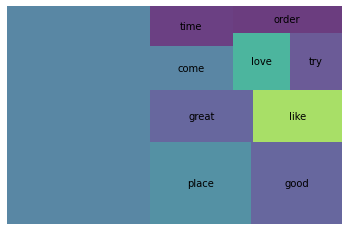

In [19]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

